# Necessary imports

In [193]:
import api_util
from dateutil import parser
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from scipy import stats
from collections import Counter
# from wordcloud import WordCloud //wordcloud doesn't support 3.11 yet :(

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/siddharth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [194]:
df = api_util.video_df
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,EuISxGGBflY,Danny Gonzalez,The Lying King,Thanks to SoFi for sponsoring the video! Enter...,"[danny gonzalez, funny, commentary, comedy, re...",2022-12-15 18:00:05+00:00,2586169.0,168440.0,NaN,7269.0,PT16M32S,hd,false,Thursday,992.0,9
1,6sh2Ib3DklI,Danny Gonzalez,I Tried Walmart's Terrifying Metaverse Experience,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-11-22 18:00:07+00:00,4039774.0,204813.0,NaN,11684.0,PT23M29S,hd,false,Tuesday,1409.0,9
2,_tgGmYerbB4,Danny Gonzalez,Trying To Find The Worst iPhone Game 2,edited by Jake Mayer https://www.instagram.com...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-27 16:00:24+00:00,4426825.0,220961.0,NaN,9333.0,PT29M4S,hd,false,Thursday,1744.0,9
3,zCoMjByGJZw,Danny Gonzalez,I Tried Ghost Hunting To See If It's Fake,spooky scary stuff\n\nshot by https://www.inst...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-01 16:00:38+00:00,7440464.0,387787.0,NaN,17905.0,PT25M45S,hd,false,Saturday,1545.0,9
4,H2fHTJZqaKA,Danny Gonzalez,The Insane Story Of The Most Dangerous Movie E...,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-09-24 17:00:07+00:00,3039689.0,179659.0,NaN,5676.0,PT19M23S,hd,false,Saturday,1163.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,GD43C6CvdVQ,Danny Gonzalez,The 9 Friends Everyone Has - Danny Gonzalez,We all know these 9 types of people.\nFollow m...,"[vine, danny gonzalez, buzzfeed, funny list, l...",2014-12-03 00:55:12+00:00,247081.0,13963.0,NaN,775.0,PT2M7S,hd,false,Wednesday,127.0,10
266,qvMOO4-JSeg,Danny Gonzalez,Go Dumb - Danny Gonzalez,This is a video I made a while ago for an old ...,"[danny gonzalez, vine, comedy, hilarious, popu...",2014-10-10 20:45:37+00:00,277072.0,11994.0,NaN,427.0,PT56S,hd,false,Friday,56.0,10
267,WRe_yup6Nw0,Danny Gonzalez,The Dying Squid - Danny Gonzalez,This is a video I made a while ago for an old ...,"[dance, funny, song, hilarious, danny gonzalez...",2014-10-03 16:21:36+00:00,552398.0,18275.0,NaN,1264.0,PT2M13S,hd,false,Friday,133.0,8
268,wtiEuGdHAIo,Danny Gonzalez,Don't Do Your Homework - Danny Gonzalez,This is a video I made a while ago on a differ...,"[homework, funny, vine, danny gonzalez, music ...",2014-10-03 03:54:27+00:00,459860.0,18176.0,NaN,1496.0,PT50S,hd,false,Friday,50.0,7


# Data Pre-Processing

### Checking Data Types

In [195]:
df.dtypes

video_id                             object
channelTitle                         object
title                                object
description                          object
tags                                 object
publishedAt         datetime64[ns, tzutc()]
viewCount                           float64
likeCount                           float64
favouriteCount                      float64
commentCount                        float64
duration                             object
definition                           object
caption                              object
pushblishDayName                     object
durationSecs                        float64
tagCount                              int64
dtype: object

### Checking for null values

In [196]:
df.isnull().any()

video_id            False
channelTitle        False
title               False
description         False
tags                False
publishedAt         False
viewCount           False
likeCount           False
favouriteCount       True
commentCount        False
duration            False
definition          False
caption             False
pushblishDayName    False
durationSecs        False
tagCount            False
dtype: bool

### Handling null tags

In [197]:
df['tags'].fillna('No tags', inplace = True)

### Converting certain columns to int

In [198]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

### Converting duration to seconds

In [199]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

In [200]:
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,EuISxGGBflY,Danny Gonzalez,The Lying King,Thanks to SoFi for sponsoring the video! Enter...,"[danny gonzalez, funny, commentary, comedy, re...",2022-12-15 18:00:05+00:00,2586169.0,168440.0,NaN,7269.0,PT16M32S,hd,false,Thursday,992.0,9
1,6sh2Ib3DklI,Danny Gonzalez,I Tried Walmart's Terrifying Metaverse Experience,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-11-22 18:00:07+00:00,4039774.0,204813.0,NaN,11684.0,PT23M29S,hd,false,Tuesday,1409.0,9
2,_tgGmYerbB4,Danny Gonzalez,Trying To Find The Worst iPhone Game 2,edited by Jake Mayer https://www.instagram.com...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-27 16:00:24+00:00,4426825.0,220961.0,NaN,9333.0,PT29M4S,hd,false,Thursday,1744.0,9
3,zCoMjByGJZw,Danny Gonzalez,I Tried Ghost Hunting To See If It's Fake,spooky scary stuff\n\nshot by https://www.inst...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-01 16:00:38+00:00,7440464.0,387787.0,NaN,17905.0,PT25M45S,hd,false,Saturday,1545.0,9
4,H2fHTJZqaKA,Danny Gonzalez,The Insane Story Of The Most Dangerous Movie E...,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-09-24 17:00:07+00:00,3039689.0,179659.0,NaN,5676.0,PT19M23S,hd,false,Saturday,1163.0,9


### Add tag count

In [201]:
df['tagCount'] = df['tags'].apply(lambda x: 0 if x is None else len(x))
df.head(3)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,durationSecs,tagCount
0,EuISxGGBflY,Danny Gonzalez,The Lying King,Thanks to SoFi for sponsoring the video! Enter...,"[danny gonzalez, funny, commentary, comedy, re...",2022-12-15 18:00:05+00:00,2586169.0,168440.0,NaN,7269.0,PT16M32S,hd,false,Thursday,992.0,9
1,6sh2Ib3DklI,Danny Gonzalez,I Tried Walmart's Terrifying Metaverse Experience,Thanks to ExpressVPN for sponsoring this video...,"[danny gonzalez, funny, commentary, comedy, re...",2022-11-22 18:00:07+00:00,4039774.0,204813.0,NaN,11684.0,PT23M29S,hd,false,Tuesday,1409.0,9
2,_tgGmYerbB4,Danny Gonzalez,Trying To Find The Worst iPhone Game 2,edited by Jake Mayer https://www.instagram.com...,"[danny gonzalez, funny, commentary, comedy, re...",2022-10-27 16:00:24+00:00,4426825.0,220961.0,NaN,9333.0,PT29M4S,hd,false,Thursday,1744.0,9


In [202]:
df.columns

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favouriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'pushblishDayName',
       'durationSecs', 'tagCount'],
      dtype='object')

# Exploring

### Best performing videos

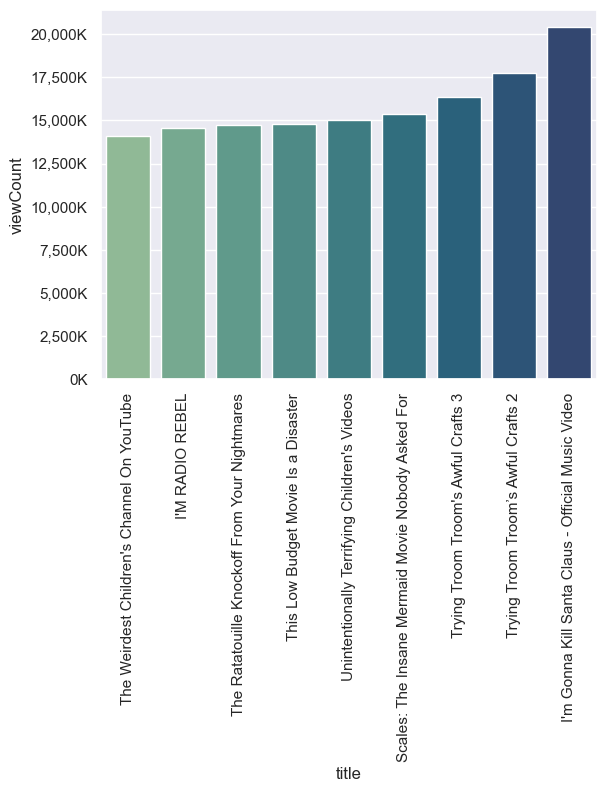

In [203]:
sns.set_theme()
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=False)[:9][::-1],palette="crest")
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Worst performing videos

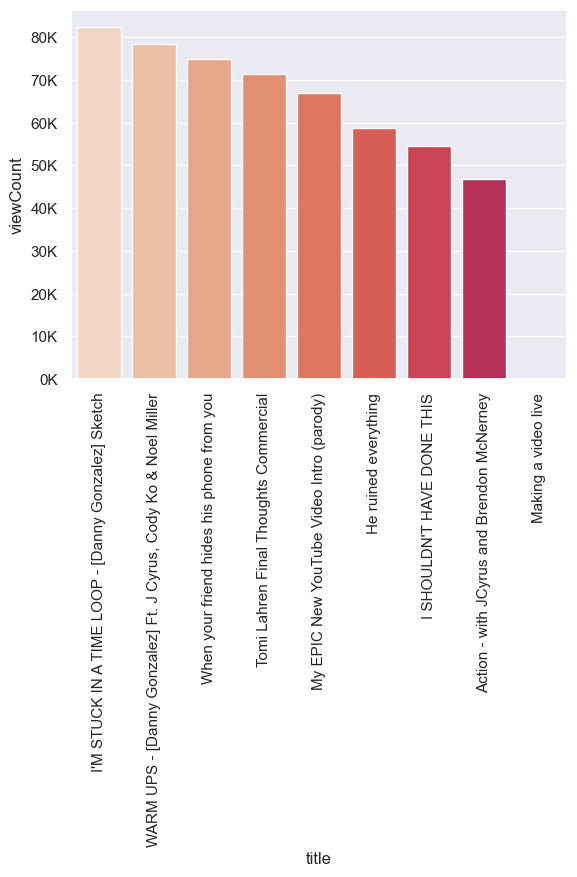

In [234]:
palette = sns.color_palette("rocket",n_colors=15)
palette.reverse()
ax = sns.barplot(x = 'title', y = 'viewCount', data = df.sort_values('viewCount', ascending=True)[:9][::-1], palette=palette)
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### View distribution per video

<AxesSubplot: xlabel='viewCount', ylabel='channelTitle'>

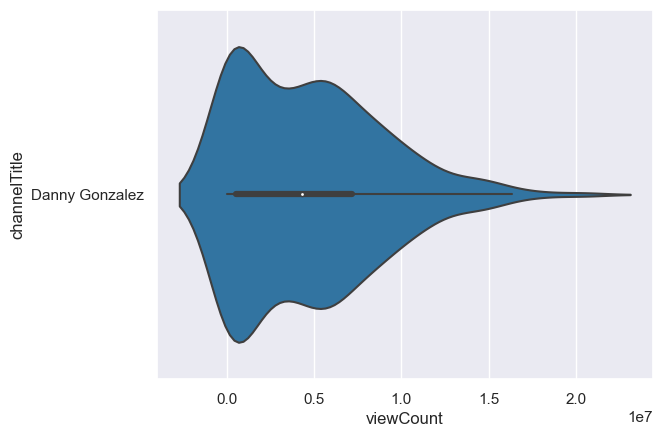

In [205]:
sns.violinplot(y=df['channelTitle'], x=df['viewCount'], palette='tab10')

### Views vs. likes

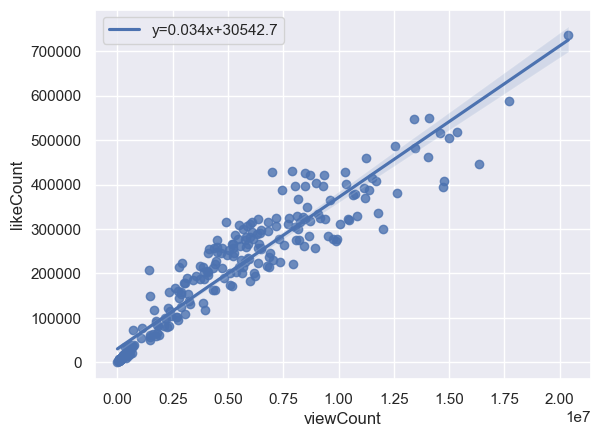

In [206]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['viewCount'], df['likeCount'])
ax = sns.regplot(x=df['viewCount'], y=df['likeCount'], line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

### Views vs. comments

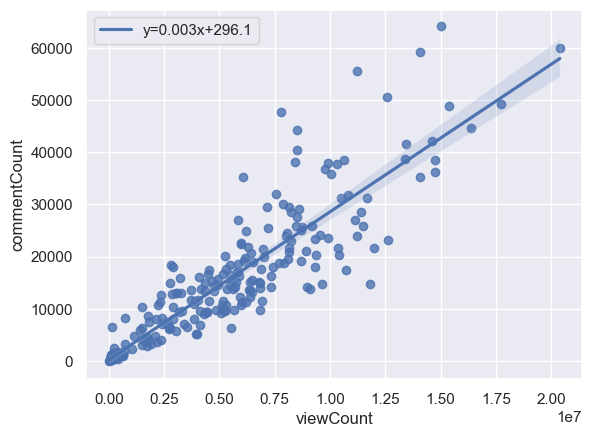

In [207]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['viewCount'], df['commentCount'])
ax = sns.regplot(x=df['viewCount'], y=df['commentCount'], line_kws={'label':"y={0:.3f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

### Views vs. duration

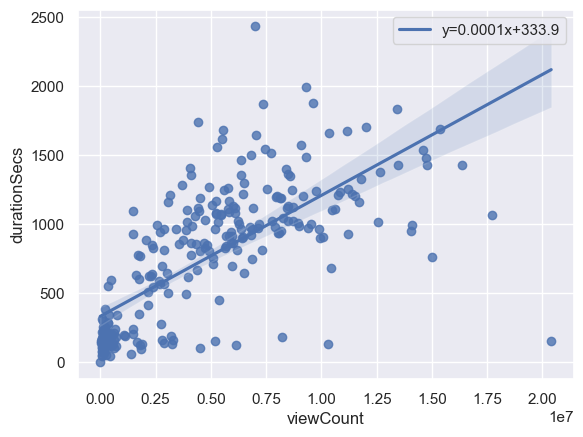

In [208]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['viewCount'], df['durationSecs'])
ax = sns.regplot(x=df['viewCount'], y=df['durationSecs'], line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

### Video duration

<AxesSubplot: xlabel='durationSecs', ylabel='Count'>

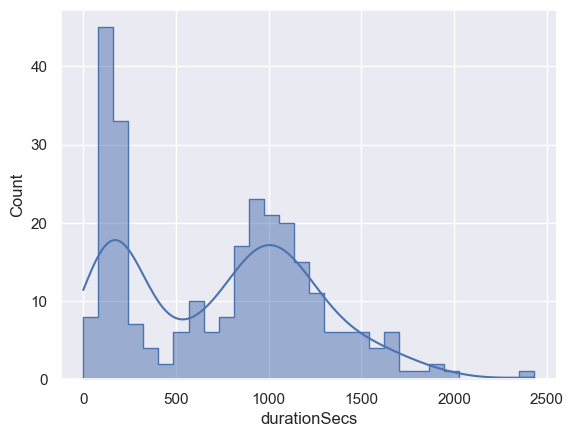

In [209]:
sns.histplot(data = df, x = 'durationSecs', bins=30,kde=True,element="step")

### Most used tags

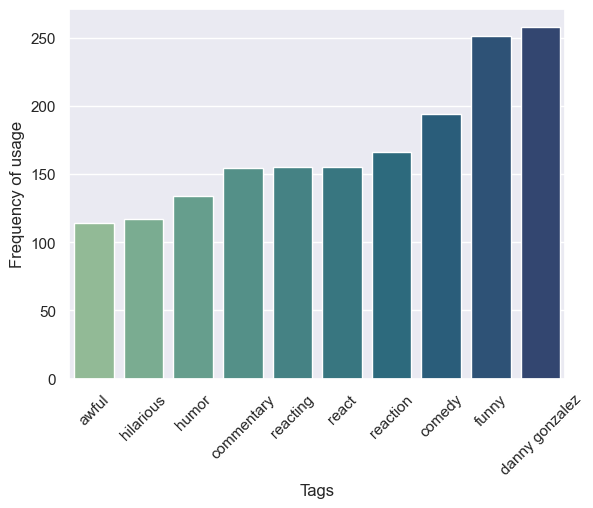

In [217]:
freq=Counter()

for tag in df['tags']:
    freq.update(tag)

freq=dict(freq.most_common(10))

keys = list(freq.keys())[::-1]
vals = [freq[k] for k in keys]
ax = sns.barplot(x=keys, y=vals, palette='crest')
ax.set(xlabel='Tags', ylabel='Frequency of usage')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Average view count per tag

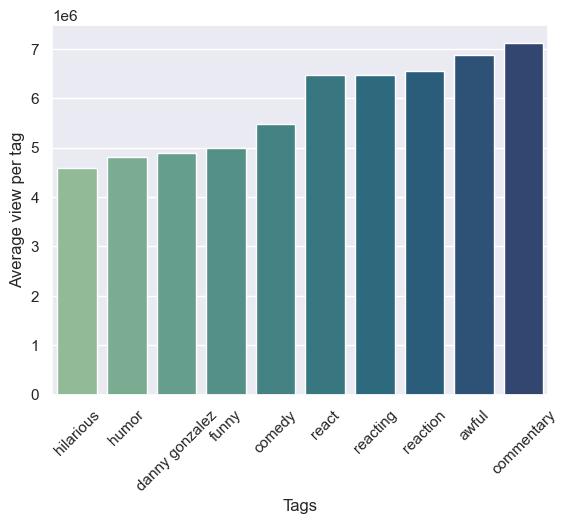

In [227]:
avg_views_per_tag = {}

for tag in freq.keys():
    count=0
    views=0
    for index, row in df.iterrows():
        if row['tags']=='No tags':
            continue
        elif tag in row['tags']:
            count+=1
            views+=row['viewCount']
    avg_views_per_tag[tag] = views/count

avg_views_per_tag = dict(sorted(avg_views_per_tag.items(), key=lambda item: item[1], reverse=True))

keys = list(avg_views_per_tag.keys())[::-1]
vals = [avg_views_per_tag[k] for k in keys]
ax = sns.barplot(x=keys, y=vals, palette='crest')
ax.set(xlabel='Tags', ylabel='Average view per tag')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)